    The groupby() function in Pandas is used to split a dataset into groups based on a column's values, perform an aggregation, and then combine the results. It follows the Split-Apply-Combine strategy.

✅ Why Use groupby()?
Aggregates data efficiently.

Useful for summarizing large datasets.

Helps in data analysis (e.g., mean, sum, count).

In [1]:
import pandas as pd
import numpy as np

In [77]:
# Sample Data
data = {
    "key": ["A", "B", "A", "B", "A", "B"],
    "value": [10, 20, 30, 40, 50, 60]
}

df = pd.DataFrame(data)
df


,key,value
0,A,10
1,B,20
2,A,30
3,B,40
4,A,50
5,B,60


In [79]:
x =df.groupby("key")

In [80]:
for key, df in x:
    print(key)
    print(df)

A
  key  value
0   A     10
2   A     30
4   A     50
B
  key  value
1   B     20
3   B     40
5   B     60


In [81]:
x.sum()

,value
key,
A,90
B,120


In [78]:
# Group by "key" and calculate sum
result = df.groupby("key")["value"].sum()
print(result)

key
A     90
B    120
Name: value, dtype: int64


In [2]:
df=pd.DataFrame(
    {"key1":list("aabbab"),
     "key2":["one","two","three"]*2,
     "data1":np.random.randn(6),
     "data2":np.random.randn(6)})
df

,key1,key2,data1,data2
0,a,one,-0.654886,-1.795524
1,a,two,0.484291,-1.311602
2,b,three,0.532805,1.347027
3,b,one,-1.375840,0.966517
4,a,two,0.785751,0.271337
5,b,three,-1.225998,-0.670020


In [3]:
group = df["data1"].groupby(df["key1"])
group

In [6]:
for key, group_df in group:
    print(f"Group {key}: ")
    print(group_df)

Group a: 
0   -0.654886
1    0.484291
4    0.785751
Name: data1, dtype: float64
Group b: 
2    0.532805
3   -1.375840
5   -1.225998
Name: data1, dtype: float64


In [7]:
group.mean()

key1
a    0.205052
b   -0.689678
Name: data1, dtype: float64

In [8]:
group.sum()

key1
a    0.615156
b   -2.069033
Name: data1, dtype: float64

In [16]:
df

,key1,key2,data1,data2
0,a,one,-0.654886,-1.795524
1,a,two,0.484291,-1.311602
2,b,three,0.532805,1.347027
3,b,one,-1.375840,0.966517
4,a,two,0.785751,0.271337
5,b,three,-1.225998,-0.670020


In [17]:
ave = df["data1"].groupby([df["key1"], df["key2"]])


In [19]:
for (key1, key2), group_df in ave:
    print(f"Group ({key1}, {key2}):")
    print(group_df)
    print()


Group (a, one):
0   -0.654886
Name: data1, dtype: float64

Group (a, two):
1    0.484291
4    0.785751
Name: data1, dtype: float64

Group (b, one):
3   -1.37584
Name: data1, dtype: float64

Group (b, three):
2    0.532805
5   -1.225998
Name: data1, dtype: float64



In [20]:
ave.mean()

key1  key2 
a     one     -0.654886
      two      0.635021
b     one     -1.375840
      three   -0.346596
Name: data1, dtype: float64

In [24]:
ave=df["data1"].groupby([df["key1"],
                         df["key2"]]).mean()
ave

key1  key2 
a     one     -0.654886
      two      0.635021
b     one     -1.375840
      three   -0.346596
Name: data1, dtype: float64

In [25]:
ave.unstack()

key2,one,three,two
key1,,,
a,-0.654886,NaN,0.635021
b,-1.375840,-0.346596,NaN


In [29]:
df.groupby("key1").mean(numeric_only=True)


,data1,data2
key1,,
a,0.205052,-0.945263
b,-0.689678,0.547841


Iterating over groups 

In [36]:
df

,key1,key2,data1,data2
0,a,one,-0.654886,-1.795524
1,a,two,0.484291,-1.311602
2,b,three,0.532805,1.347027
3,b,one,-1.375840,0.966517
4,a,two,0.785751,0.271337
5,b,three,-1.225998,-0.670020


In [39]:
for name, group in df.groupby("key1"):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.654886 -1.795524
1    a  two  0.484291 -1.311602
4    a  two  0.785751  0.271337
b
  key1   key2     data1     data2
2    b  three  0.532805  1.347027
3    b    one -1.375840  0.966517
5    b  three -1.225998 -0.670020


In [44]:
df

,key1,key2,data1,data2
0,a,one,-0.654886,-1.795524
1,a,two,0.484291,-1.311602
2,b,three,0.532805,1.347027
3,b,one,-1.375840,0.966517
4,a,two,0.785751,0.271337
5,b,three,-1.225998,-0.670020


In [48]:
new_df = pd.DataFrame({
    "key1" : ['b'],
    "key2" : ["two"],
    "data1" : [-1.0333],
    "data2" : [1.234]
})

new_df

,key1,key2,data1,data2
0,b,two,-1.0333,1.234


In [49]:
pd.concat([df, new_df], ignore_index=True)

,key1,key2,data1,data2
0,a,one,-0.654886,-1.795524
1,a,two,0.484291,-1.311602
2,b,three,0.532805,1.347027
3,b,one,-1.375840,0.966517
4,a,two,0.785751,0.271337
5,b,three,-1.225998,-0.670020
6,b,two,-1.033300,1.234000


In [50]:
df.loc[7] = ['b', 'two', 1.342, -0.9999]

In [51]:
df

,key1,key2,data1,data2
0,a,one,-0.654886,-1.795524
1,a,two,0.484291,-1.311602
2,b,three,0.532805,1.347027
3,b,one,-1.375840,0.966517
4,a,two,0.785751,0.271337
5,b,three,-1.225998,-0.670020
7,b,two,1.342000,-0.999900


In [52]:
for name, group in df.groupby("key1"):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.654886 -1.795524
1    a  two  0.484291 -1.311602
4    a  two  0.785751  0.271337
b
  key1   key2     data1     data2
2    b  three  0.532805  1.347027
3    b    one -1.375840  0.966517
5    b  three -1.225998 -0.670020
7    b    two  1.342000 -0.999900


In [56]:
for (x1, x2), group in  df.groupby(["key1", "key2"]):
    print(f"Group {x1}, {x2}")
    print(group)

Group a, one
  key1 key2     data1     data2
0    a  one -0.654886 -1.795524
Group a, two
  key1 key2     data1     data2
1    a  two  0.484291 -1.311602
4    a  two  0.785751  0.271337
Group b, one
  key1 key2    data1     data2
3    b  one -1.37584  0.966517
Group b, three
  key1   key2     data1     data2
2    b  three  0.532805  1.347027
5    b  three -1.225998 -0.670020
Group b, two
  key1 key2  data1   data2
7    b  two  1.342 -0.9999


In [57]:
piece = dict(list(df.groupby("key1")))

In [62]:
piece['a']

,key1,key2,data1,data2
0,a,one,-0.654886,-1.795524
1,a,two,0.484291,-1.311602
4,a,two,0.785751,0.271337


Selecting a Column or Subset of Columns

In [63]:
fruit=pd.DataFrame(np.random.randn(4,4),
                   columns=list("abcd"),
                   index=["apple","cherry",
                          "banana","kiwi"])
fruit

,a,b,c,d
apple,-0.726379,1.655655,0.427482,-1.159997
cherry,0.254746,-2.199572,0.914541,0.167612
banana,-1.397643,-0.350878,0.115104,0.449922
kiwi,1.963157,0.298344,-0.339127,2.309044


In [64]:
label={"a": "green","b":"yellow",
       "c":"green","d":"yellow",
       "e":"purple"}

In [65]:
group = fruit.groupby(label, axis = 1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_35180\533483285.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  group = fruit.groupby(label, axis = 1)


In [66]:
for x, df in group:
    print(x)
    print(df)

green
               a         c
apple  -0.726379  0.427482
cherry  0.254746  0.914541
banana -1.397643  0.115104
kiwi    1.963157 -0.339127
yellow
               b         d
apple   1.655655 -1.159997
cherry -2.199572  0.167612
banana -0.350878  0.449922
kiwi    0.298344  2.309044


In [70]:
group.sum()

,green,yellow
apple,-0.298897,0.495658
cherry,1.169288,-2.031960
banana,-1.282539,0.099044
kiwi,1.624031,2.607387


In [71]:
s = pd.Series(label)
s

a     green
b    yellow
c     green
d    yellow
e    purple
dtype: object

In [73]:
fruit.groupby(s, axis = 1).count()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_35180\772935727.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  fruit.groupby(s, axis = 1).count()


,green,yellow
apple,2,2
cherry,2,2
banana,2,2
kiwi,2,2


Grouping by Index Levels

In [87]:
data=pd.DataFrame(np.random.randn(4,5),
                  columns=[list("AAABB"),
                           [1,2,3,1,2],])

data

A                             B          
          1         2         3         1         2
0  2.614743  0.524555 -1.409847  2.273253 -1.537140
1  1.352983  2.484287 -0.028115 -3.144557 -0.381010
2  0.955294 -0.774065 -0.216546 -0.620188  1.548306
3  0.448733 -0.248507 -0.205240  0.473351 -1.409795

In [90]:
data.columns.names = ["letter", "number"]
data

letter         A                             B          
number         1         2         3         1         2
0       2.614743  0.524555 -1.409847  2.273253 -1.537140
1       1.352983  2.484287 -0.028115 -3.144557 -0.381010
2       0.955294 -0.774065 -0.216546 -0.620188  1.548306
3       0.448733 -0.248507 -0.205240  0.473351 -1.409795

In [91]:
data.groupby(level="letter", axis = 1).sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_35180\1758690772.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level="letter", axis = 1).sum()


letter,A,B
0,1.729451,0.736113
1,3.809155,-3.525567
2,-0.035317,0.928117
3,-0.005014,-0.936444


### Application with Real Data Set

In [94]:
game=pd.read_csv("Datasets/vgsalesGlobale.csv")

In [95]:
game.shape

(16598, 11)

In [96]:
game.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [99]:
game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [100]:
game.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [101]:
game.dropna().describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [103]:
game.Global_Sales.mean()

np.float64(0.5374406555006628)

In [104]:
game.Genre.value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

In [105]:
group = game.groupby('Genre')

In [107]:
for x, df in group:
    print(x)
    print(df)

Action
        Rank                                               Name Platform  \
16        17                                 Grand Theft Auto V      PS3   
17        18                      Grand Theft Auto: San Andreas      PS2   
23        24                                 Grand Theft Auto V     X360   
24        25                        Grand Theft Auto: Vice City      PS2   
38        39                               Grand Theft Auto III      PS2   
...      ...                                                ...      ...   
16564  16567      Original Frisbee Disc Sports: Ultimate & Golf       DS   
16567  16570  Fujiko F. Fujio Characters: Great Assembly! Sl...      3DS   
16582  16585                                    Planet Monsters      GBA   
16583  16586                                     Carmageddon 64      N64   
16589  16592  Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...      PSV   

         Year   Genre                  Publisher  NA_Sales  EU_Sales  \
16     2

In [109]:
group["Global_Sales"].count()

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
Name: Global_Sales, dtype: int64

In [110]:
group["Global_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3316.0,0.528100,1.156427,0.01,0.07,0.190,0.5000,21.40
Adventure,1286.0,0.185879,0.513280,0.01,0.02,0.060,0.1600,11.18
Fighting,848.0,0.529375,0.955965,0.01,0.08,0.210,0.5500,13.04
Misc,1739.0,0.465762,1.314886,0.01,0.06,0.160,0.4100,29.02
Platform,886.0,0.938341,2.585254,0.01,0.09,0.280,0.7900,40.24
Puzzle,582.0,0.420876,1.561716,0.01,0.04,0.110,0.3075,30.26
Racing,1249.0,0.586101,1.662437,0.01,0.07,0.190,0.5300,35.82
Role-Playing,1488.0,0.623233,1.707909,0.01,0.07,0.185,0.5225,31.37
Shooter,1310.0,0.791885,1.817263,0.01,0.08,0.230,0.7275,28.31


In [119]:
game[game.Genre=="Action"].Global_Sales.mean()

np.float64(0.5281001206272617)

In [122]:
%matplotlib inline

<Axes: xlabel='Genre'>

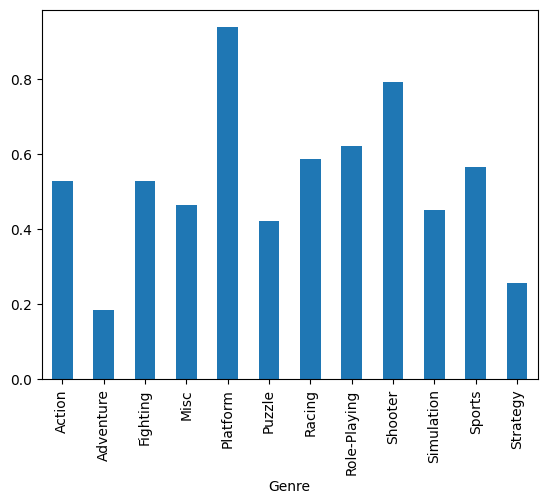

In [123]:
group["Global_Sales"].mean().plot(kind="bar")